In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from utility import load_mnist_images, load_mnist_labels, one_hot_encoding, split_holdout, \
plot_cost_acc, plot_diff
from backpro import NN_model

In [2]:
train_images = load_mnist_images('train-images.idx3-ubyte')
train_labels = load_mnist_labels('train-labels.idx1-ubyte')
test_images = load_mnist_images('t10k-images.idx3-ubyte')
test_labels = load_mnist_labels('t10k-labels.idx1-ubyte')

#test_images = test_images[-2000:]
#test_labels = test_labels[-2000:]

'''
# Show A Image
plt.gray()
plt.imshow(train_images_ori[50])
plt.show()
'''

m_train = train_images.shape[0] # number of training data
m_test = test_images.shape[0] # number of test data



train_images = train_images.reshape(m_train, -1).T / 127.5 - 1
test_images = test_images.reshape(m_test, -1).T / 127.5 - 1


train_X = train_images
test_X = test_images

train_Y = one_hot_encoding(train_labels, 10)
test_Y = one_hot_encoding(test_labels, 10)

holdout_ratio = 0.16;
train_X, train_Y, holdout_X, holdout_Y = split_holdout(train_images, train_Y, holdout_ratio)

20 epoches cost: 0.043440
40 epoches cost: 0.033174
60 epoches cost: 0.006112
80 epoches cost: 0.011125
100 epoches cost: 0.004332
120 epoches cost: 0.001601
140 epoches cost: 0.002768
160 epoches cost: 0.003459
180 epoches cost: 0.001478
200 epoches cost: 0.001522
Predict Accuracy on Test Set: 0.966500


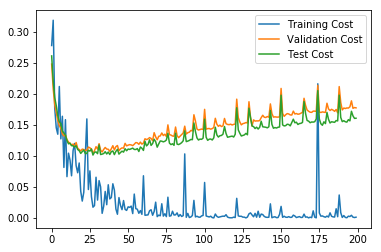

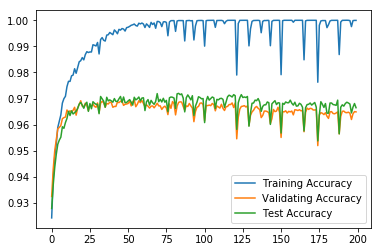

In [3]:
layers = [784, 64, 10]

model = NN_model(layers, 200)
train, val, test = model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
model.predict(test_X, test_Y)
    
print('Predict Accuracy on Test Set: %f' % (model.accuracy))
'''
print(model.Y_p[:20])
print(np.argmax(test_Y, axis=0)[:20])
'''
plot_cost_acc(train, val, test)

In [25]:
model.gradient_check(train_X[:,:2000], train_Y[:,:2000])

Gradient check found 23 possible problems.


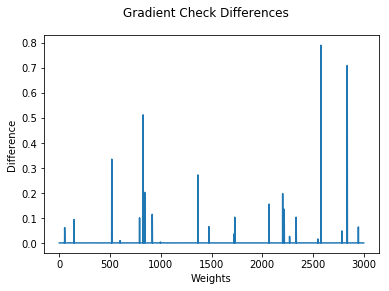

In [26]:
plot_diff(model.diff)

In [ ]:
# this section of code was run without division of fan-in in the weight init
layers = [784, 64, 10]

model = NN_model(layers, 200)
train, val, test = model.fit(train_X, train_Y, holdout_X, holdout_Y)
model.predict(test_X, test_Y)
    
print('Predict Accuracy on Test Set: %f' % (model.accuracy))

In [ ]:
# this section of code was run with ordinary gradient descent
layers = [784, 64, 10]

model = NN_model(layers, 200, activation='sigmoid')
train, val, test = model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
model.predict(test_X, test_Y)
plot_cost_acc(train, val, test)
print('Predict Accuracy on Test Set: %f' % (model.accuracy))

In [ ]:
# this section of code was run with 0.9 momentum
layers = [784, 64, 10]

model = NN_model(layers, 200, activation='sigmoid')
train, val, test = model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
model.predict(test_X, test_Y)
plot_cost_acc(train, val, test)
print('Predict Accuracy on Test Set: %f' % (model.accuracy))

In [ ]:
# this section of code was run with our adam
layers = [784, 64, 10]

model = NN_model(layers, 200, activation='sigmoid')
train, val, test = model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
model.predict(test_X, test_Y)
plot_cost_acc(train, val, test)
print('Predict Accuracy on Test Set: %f' % (model.accuracy))

In [27]:
#Experiment new structures

20 epoches cost: 0.086522
40 epoches cost: 0.039139
60 epoches cost: 0.014999
80 epoches cost: 0.014987
100 epoches cost: 0.007398
120 epoches cost: 0.003925
140 epoches cost: 0.003404
160 epoches cost: 0.000961
180 epoches cost: 0.041820
200 epoches cost: 0.002679


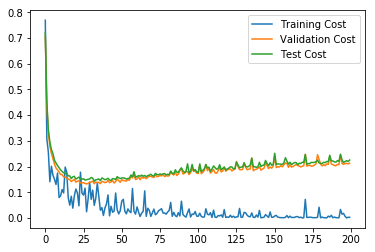

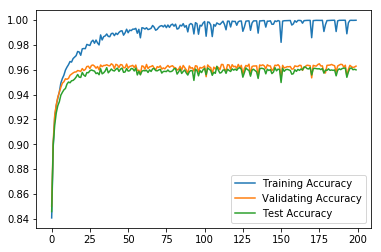

Predict Accuracy on Test Set: 0.959900


In [28]:
## double hidden layer
layers = [784, 48, 16, 10]
model = NN_model(layers, 200)
train, val, test = model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
plot_cost_acc(train, val, test)
model.predict(test_X, test_Y)
print('Predict Accuracy on Test Set: %f' % (model.accuracy))

20 epoches cost: 0.083493
40 epoches cost: 0.051136
60 epoches cost: 0.028475
80 epoches cost: 0.060073
100 epoches cost: 0.005407
120 epoches cost: 0.013625
140 epoches cost: 0.008439
160 epoches cost: 0.033610
180 epoches cost: 0.007982
200 epoches cost: 0.001268


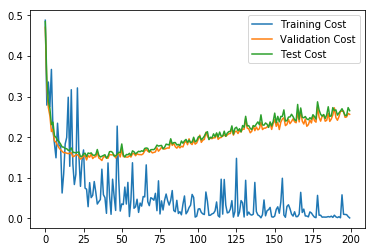

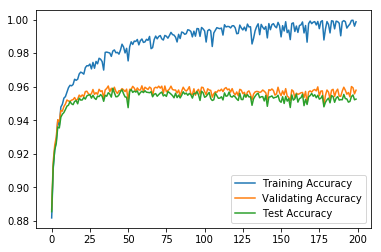

Predict Accuracy on Test Set: 0.952600


In [29]:
## double hidden layer
layers = [784, 32, 32, 10]
model = NN_model(layers, 200)
train, val, test = model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
plot_cost_acc(train, val, test)
model.predict(test_X, test_Y)
print('Predict Accuracy on Test Set: %f' % (model.accuracy))

20 epoches cost: 0.065296
40 epoches cost: 0.078921
60 epoches cost: 0.020274
80 epoches cost: 0.044869
100 epoches cost: 0.003691
120 epoches cost: 0.004831
140 epoches cost: 0.005937
160 epoches cost: 0.004134
180 epoches cost: 0.002879
200 epoches cost: 0.003971


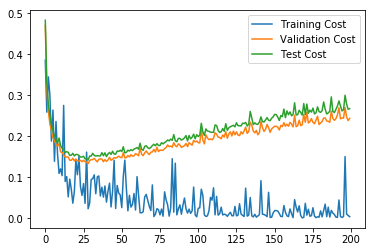

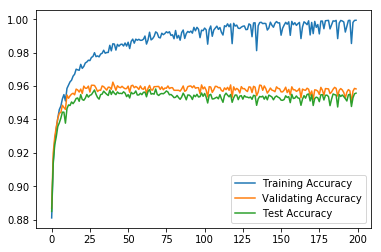

Predict Accuracy on Test Set: 0.955800


In [30]:
# use tanh
layers = [784, 64, 10]
model = NN_model(layers, 200, activation='tanh')
train, val, test = model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
plot_cost_acc(train, val, test)
model.predict(test_X, test_Y)
print('Predict Accuracy on Test Set: %f' % (model.accuracy))

20 epoches cost: 0.007429
40 epoches cost: 0.035758
60 epoches cost: 0.000722
80 epoches cost: 0.000735
100 epoches cost: 0.001116


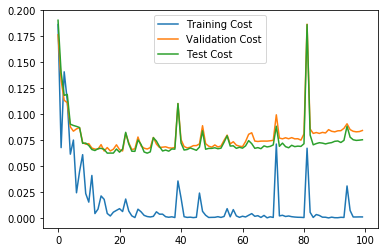

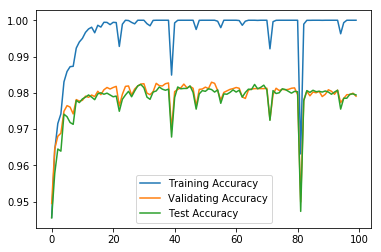

Predict Accuracy on Test Set: 0.979400


In [33]:
# Use more neurons
layers = [784, 512, 10]
model = NN_model(layers, 100, activation='sigmoid')
train, val, test = model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
plot_cost_acc(train, val, test)
model.predict(test_X, test_Y)
print('Predict Accuracy on Test Set: %f' % (model.accuracy))

20 epoches cost: 0.013029
40 epoches cost: 0.000523
60 epoches cost: 0.000986
80 epoches cost: 0.000051
100 epoches cost: 0.000241


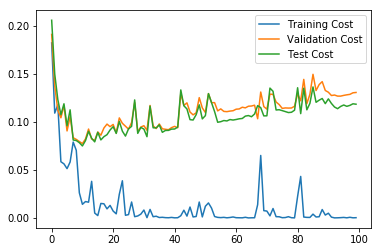

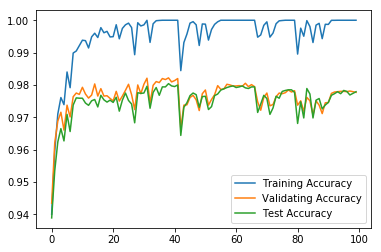

Predict Accuracy on Test Set: 0.977900


In [34]:
## double hidden layers ,more neurons
layers = [784, 300, 100, 10]
model = NN_model(layers, 100)
train, val, test = model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
plot_cost_acc(train, val, test)
model.predict(test_X, test_Y)
print('Predict Accuracy on Test Set: %f' % (model.accuracy))